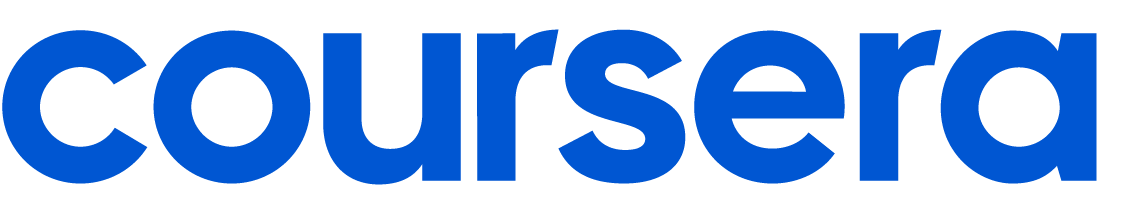

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## Importing Python Modules

Some of the following popular packages sre as follows:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

## Loading the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_data`, and `test.csv` into a dataframe `test_data` and display the shape of the dataframes.

In [3]:
train_data = pd.read_csv("train.csv")
print('train_data Shape:', train_data.shape)
train_data.head()

train_data Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
test_data = pd.read_csv("test.csv")
print('test_data Shape:', test_data.shape)
test_data.head()

test_data Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Exploring, Cleaning, and Validating  the Data

In [5]:
print("Training set\n")
print(train_data.isnull().sum())
print("------------------------------\n")
print("Test set\n")
print(test_data.isnull().sum())
print("------------------------------")

Training set

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64
------------------------------

Test set

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
A

One-hot encoding with integer data type

In [6]:
encoded_train_data = pd.get_dummies(train_data, 
                                    columns = ['SubscriptionType', 
                                               'PaymentMethod', 
                                               'PaperlessBilling', 
                                               'ContentType', 
                                               'MultiDeviceAccess', 
                                               'DeviceRegistered',
                                               'GenrePreference', 
                                               'Gender', 
                                               'ParentalControl', 
                                               'SubtitlesEnabled'],
                                               dtype = int)
print('encoded_train_data Shape:', encoded_train_data.shape)
encoded_train_data.head()

encoded_train_data Shape: (243787, 40)


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,CB6SXPNVZA,...,0,0,0,1,0,1,1,0,1,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,S7R2G87O09,...,0,0,0,0,0,1,1,0,0,1
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,EASDC20BDT,...,0,0,1,0,0,1,0,1,0,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,NPF69NT69N,...,0,1,0,0,0,1,0,1,0,1
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,4LGYPK7VOL,...,1,0,0,0,1,0,1,0,1,0


In [7]:
encoded_test_data = pd.get_dummies(test_data, 
                                    columns = ['SubscriptionType', 
                                               'PaymentMethod', 
                                               'PaperlessBilling', 
                                               'ContentType', 
                                               'MultiDeviceAccess', 
                                               'DeviceRegistered',
                                               'GenrePreference', 
                                               'Gender', 
                                               'ParentalControl', 
                                               'SubtitlesEnabled'],
                                               dtype = int)
print('encoded_test_data:', encoded_test_data.shape)
encoded_test_data.head()

encoded_test_data: (104480, 39)


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,38,17.869374,679.036195,29.126308,122.274031,42,3.522724,2,23,O1W6BHP6RM,...,1,0,0,0,0,1,1,0,1,0
1,77,9.912854,763.289768,36.873729,57.093319,43,2.021545,2,22,LFR4X92X8H,...,0,0,0,0,1,0,0,1,1,0
2,5,15.019011,75.095057,7.601729,140.414001,14,4.806126,2,22,QM5GBIYODA,...,0,0,0,1,1,0,1,0,0,1
3,88,15.357406,1351.451692,35.586430,177.002419,14,4.943900,0,23,D9RXTK2K9F,...,1,0,0,0,1,0,0,1,0,1
4,91,12.406033,1128.949004,23.503651,70.308376,6,2.846880,6,0,ENTCCHR1LR,...,0,1,0,0,1,0,1,0,1,0


Label encoding can also be used
Label encoding using the 'LabelEncoder' class from scikit-learn.


In [8]:
# # Create an instance of LabelEncoder
# le = LabelEncoder()

# # List of columns to be encoded
# columns_to_encode = ['SubscriptionType', 
#                      'PaymentMethod', 
#                      'PaperlessBilling', 
#                      'ContentType', 
#                      'MultiDeviceAccess', 
#                      'DeviceRegistered',
#                      'GenrePreference', 
#                      'Gender', 
#                      'ParentalControl', 
#                      'SubtitlesEnabled']

# # Loop through each column and encode its values
# for column in columns_to_encode:
#     train_data[column + '_encoded'] = le.fit_transform(train_data[column])

# # Drop the original categorical columns from the DataFrame
# train_data.drop(columns_to_encode, axis=1, inplace=True)

# # Create an instance of LabelEncoder
# le = LabelEncoder()

# # List of columns to be encoded
# columns_to_encode = ['SubscriptionType', 
#                      'PaymentMethod', 
#                      'PaperlessBilling', 
#                      'ContentType', 
#                      'MultiDeviceAccess', 
#                      'DeviceRegistered',
#                      'GenrePreference', 
#                      'Gender', 
#                      'ParentalControl', 
#                      'SubtitlesEnabled']

# # Loop through each column and encode its values
# for column in columns_to_encode:
#     test_data[column + '_encoded'] = le.fit_transform(test_data[column])

# # Drop the original categorical columns from the DataFrame
# test_data.drop(columns_to_encode, axis=1, inplace=True)

In [9]:
# List of columns to be normalized in the training data
columns_to_normalize = ['AccountAge', 
                        'MonthlyCharges', 
                        'TotalCharges', 
                        'ViewingHoursPerWeek', 
                        'AverageViewingDuration', 
                        'ContentDownloadsPerMonth', 
                        'UserRating', 
                        'SupportTicketsPerMonth', 
                        'WatchlistSize']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data in the specified columns
encoded_train_data[columns_to_normalize] = scaler.fit_transform(encoded_train_data[columns_to_normalize])

encoded_train_data.head(10)

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,0.161017,0.404346,0.091044,0.916881,0.334464,0.204082,0.294124,0.444444,0.125000,CB6SXPNVZA,...,0,0,0,1,0,1,1,0,1,0
1,0.474576,0.012343,0.122169,0.806430,0.118430,0.367347,0.619659,0.888889,0.958333,S7R2G87O09,...,0,0,0,0,0,1,1,0,0,1
2,0.610169,0.474443,0.370216,0.163978,0.299222,0.469388,0.809708,0.666667,0.041667,EASDC20BDT,...,0,0,1,0,0,1,0,1,0,1
3,0.262712,0.151580,0.095819,0.691296,0.723074,0.612245,0.819005,0.222222,1.000000,NPF69NT69N,...,0,1,0,0,0,1,0,1,0,1
4,0.474576,0.797540,0.404988,0.489320,0.230608,0.408163,0.654044,0.444444,0.000000,4LGYPK7VOL,...,1,0,0,0,1,0,1,0,1,0
5,0.949153,0.153713,0.345206,0.530216,0.526262,0.714286,0.680285,0.888889,0.083333,JY5HS0GWHW,...,1,0,0,0,1,0,0,1,0,1
6,0.313559,0.490044,0.195454,0.910590,0.438760,0.571429,0.772719,1.000000,0.833333,79XSO6P5O3,...,0,0,0,0,1,0,1,0,0,1
7,0.203390,0.150500,0.074228,0.393741,0.854413,0.204082,0.602556,0.222222,0.916667,2LDC9AQ3C5,...,0,0,1,0,1,0,1,0,1,0
8,0.211864,0.987552,0.214806,0.184690,0.510716,0.571429,0.419997,0.000000,0.208333,74DURHL3Y8,...,0,0,1,0,0,1,0,1,0,1
9,0.110169,0.923531,0.109031,0.963101,0.668647,0.000000,0.498361,0.000000,0.750000,CY8S2R3A1T,...,1,0,0,0,0,1,1,0,1,0


In [10]:
# List of columns to be normalized in the test data
columns_to_normalize = ['AccountAge', 
                        'MonthlyCharges', 
                        'TotalCharges', 
                        'ViewingHoursPerWeek', 
                        'AverageViewingDuration', 
                        'ContentDownloadsPerMonth', 
                        'UserRating', 
                        'SupportTicketsPerMonth', 
                        'WatchlistSize']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data in the specified columns
encoded_test_data[columns_to_normalize] = scaler.fit_transform(encoded_test_data[columns_to_normalize])

encoded_test_data.head(10)

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,0.313559,0.858636,0.284250,0.721197,0.670136,0.857143,0.630691,0.222222,0.958333,O1W6BHP6RM,...,1,0,0,0,0,1,1,0,1,0
1,0.644068,0.328192,0.319781,0.919855,0.297673,0.877551,0.255388,0.222222,0.916667,LFR4X92X8H,...,0,0,0,0,1,0,0,1,1,0
2,0.033898,0.668609,0.029553,0.169267,0.773794,0.285714,0.951548,0.222222,0.916667,QM5GBIYODA,...,0,0,0,1,1,0,1,0,0,1
3,0.737288,0.691169,0.567824,0.886846,0.982872,0.285714,0.985992,0.000000,0.958333,D9RXTK2K9F,...,1,0,0,0,1,0,0,1,0,1
4,0.762712,0.494407,0.473989,0.577021,0.373188,0.122449,0.461726,0.666667,0.000000,ENTCCHR1LR,...,0,1,0,0,1,0,1,0,1,0
5,0.033898,0.936490,0.038026,0.873305,0.327719,0.020408,0.173812,0.111111,0.250000,7A88BB5IO6,...,1,0,0,0,0,1,0,1,1,0
6,0.864407,0.276339,0.394689,0.134294,0.661348,0.183673,0.728144,0.444444,0.916667,70OMW9XEWR,...,0,0,0,1,0,1,0,1,1,0
7,0.177966,0.138663,0.063478,0.137757,0.606490,0.714286,0.372010,1.000000,0.291667,EL1RMFMPYL,...,0,0,1,0,1,0,1,0,1,0
8,0.169492,0.108371,0.056472,0.450372,0.186927,0.897959,0.606436,0.555556,0.333333,4IA2QPT6ZK,...,0,0,1,0,1,0,1,0,0,1
9,0.720339,0.429957,0.412767,0.678652,0.070421,0.387755,0.193043,1.000000,0.125000,AEDCWHSJDN,...,0,0,0,1,0,1,1,0,1,0


In [11]:
train_df = encoded_train_data.drop(columns=['CustomerID'])
test_df = encoded_test_data.drop(columns=['CustomerID'])

## Making predictions

In [12]:
# Separate the target variable from the features in the train data
X_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']

In [13]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We can also use 'RandomForestClassifier' <br/> `from sklearn.ensemble import RandomForestClassifier` <br/>
`model = RandomForestClassifier(random_state=42)`

In [14]:
# Predict the probability of churn for test data
X_test = test_df
predicted_probabilities = model.predict_proba(X_test)[:, 1]

In [15]:
# Create the prediction dataframe
prediction_df = pd.DataFrame({
    'CustomerID': test_data['CustomerID'],
    'predicted_probability': predicted_probabilities
})

# Save the dataframe to a CSV file or use it as needed
# prediction_df.to_csv('prediction.csv', index=False)

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [16]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [17]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [18]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [19]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [20]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!

## ROC AUC score was calculated as: 0.7509
